In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri
from plot_functions import latexify, format_axes

In [6]:
latexify(columns=1, fig_height=3.)

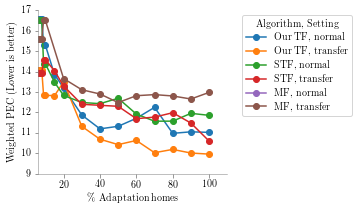

In [8]:
out = pickle.load(open('../predictions/lr-tf-SanDiego-Austin-all.pkl','r'))
out_mf = pickle.load(open('../predictions/mf-SanDiego-Austin.pkl','r'))

constant = 'True'
static = 'False'
for case in [2, 4]:
    
    for transfer in ['normal', 'transfer']:
        if case==2:
            algo = "{}, {}".format("Our TF", transfer)
        else:
            algo = "{}, {}".format("STF", transfer)
        error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o')
    

for transfer in ['normal', 'transfer']:
       
        algo = "{}, {}".format("MF", transfer)
        error = (pd.DataFrame(out_mf[transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o')




    
plt.legend(bbox_to_anchor=(1.05, 1), title='Algorithm, Setting')
plt.xlim((6, 110))
plt.ylim((9, 17))
format_axes(plt.gca())
plt.xlabel(r"\% Adaptation homes")
plt.ylabel("Weighted PEC (Lower is better)")
plt.savefig('../figures/main-austin.pdf', bbox_inches="tight")